In [ ]:
import numpy as np
import csv
import time
import math
import random
import matplotlib.pyplot as plt
from scipy.stats import mode
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
def get_dataset(filename):
  with open(filename, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    ans = []
    for row in reader:
      values = list(map(float, row.values()))
      ans.append(values)
    return np.array(ans)

dataset = get_dataset('sample_data/titanic_data.csv')
dataset
X = dataset[:,1:]
y = dataset[:,0]
N = len(X)

**kNN**

In [ ]:
def euclidean_distance(point1, point2):
	return np.linalg.norm(point1[2:] - point2[2:])

def categorical_dist(point1, point2):
  return (point1[0] == point2[0]) + (point1[1] == point2[1])

def distance(point1, point2):
  return categorical_dist(point1, point2) + euclidean_distance(point1, point2)

def k_nearest_neighbors(dist, K, X, y, x):
  distances = []
  for i in range(len(X)): 
    distances.append(dist(np.array(X[i,:]) , x))
  distances = np.array(distances)
  kClosest = np.argsort(distances)[:K]
  pred_y = y[kClosest]
  label = mode(pred_y)[0]
  return label[0]

x = [3,1,26,0,0,7.925]
K = 12
print(k_nearest_neighbors(distance, K, X, y, x))

0.0


In [19]:
x = [1, 0, 25, 3, 2, 20]
preds = []
for K in range(1, N+1):
  preds.append(k_nearest_neighbors(distance, K, X, y, x))

In [20]:
preds = np.array(preds)
a = preds[:]
a[np.where(a == 0)] = -1

In [29]:
np.where(a == 1)[0]

array([ 0,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37, 38,
       40])

In [27]:
len(np.where(a == 1)[0])

35

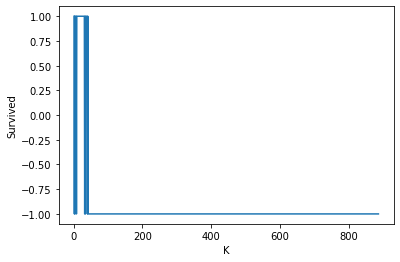

In [21]:
plt.figure()
plt.plot(list(range(1, N+1)), a)
plt.xlabel("K")
plt.ylabel("Survived")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [ ]:
model_k_accuracy = [0]*(N+1)
for K in range(1, N+1):
  y_pred = []
  for x in X_test:
    y_pred.append(k_nearest_neighbors(distance, K, X_train, y_train, x))
  model_k_accuracy[K] = (accuracy_score(y_test, y_pred))  

In [ ]:
model_k_accuracy

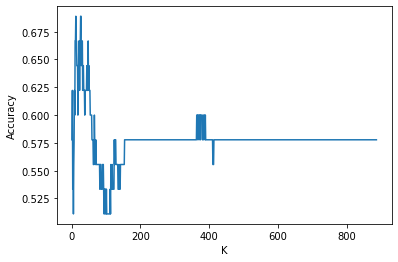

In [ ]:
plt.figure()
plt.plot(list(range(1, N+1)), model_k_accuracy[1:])
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

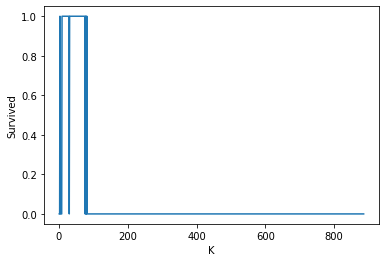

In [ ]:

plt.figure()
plt.plot(list(range(1, N)), preds)
# plt.hist(preds)
plt.xlabel("K")
plt.ylabel("Survived")
plt.show()

Ideal value for K

**NAIVE BAYES:**

In [34]:
def prior():
  n = len(y)
  d = np.bincount(y.astype(int))
  return (d[0]/n, d[1]/n)

# prior()

In [ ]:
def multinomial_dist(index, val, label):
  X_dash = X[np.where(y == label)]
  n = len(X_dash[:, index])
  return (np.bincount(X_dash[:,index].astype(int)+1)[int(val)])/(n+len(X))

# multinomial_dist(0, 1, 0)
# multinomial_dist(2, 1)

0.14678899082568808

In [ ]:
def gaussian_dist(index, val, label):
  X_dash = X[np.where(y == label)]
  mean = np.mean(X_dash[:, index])
  variance = np.var(X_dash[:, index])
  denom = (2*math.pi*variance)**.5
  num = math.exp(-(float(val)-float(mean))**2/(2*variance))
  return num/denom

gaussian_dist(3, 2, 0)

0.1655764790140397

In [ ]:
def likelihood(index, val, label):
  if index in [0,1]:
    return multinomial_dist(index, val, label)
  else:
    return gaussian_dist(index, val, label)

In [ ]:
def posterior(x, label):
  p = prior()[label]
  for i in range(len(x)):
    p *= likelihood(i, x[i], label)
  return p

x = [3,0,22,1,0,7.25]
posterior(x, 0)
posterior(x, 1)

9.803578347977938e-07

In [ ]:
def naive_bayes(x):  
  y_0 = posterior(x, 0)
  y_1 = posterior(x, 1)
  return 1 if y_1 >= y_0 else 0

# naive_bayes(x = [3,0,22,1,0,7.25])    
naive_bayes(x = [1,1,38,1,0,71.2833])

1

### **5.2 (c) Build your own feature vector x. According to your Naive Bayes classifier, would you have survived the titanic sinking? **

In [ ]:
naive_bayes(x = [1, 0, 45, 2, 2, 20])

0

**Accuracy**

In [ ]:
predictions = []
for i in X:
  predictions.append(naive_bayes(i))


In [ ]:
conf_matrix = confusion_matrix(y_true=y, y_pred=predictions)
conf_matrix

array([[484,  61],
       [126, 216]])

In [ ]:
print(precision_score(y, predictions))
print(recall_score(y, predictions))

0.779783393501805
0.631578947368421


In [ ]:
true_values = y
accuracy = (true_values == predictions).sum() / N
accuracy

0.7891770011273957

In [ ]:
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
precision = TP / (TP+FP)
precision

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [33]:
a.index(max(a))

12